5. COVID-19 Data Analysis
   - Goal: Analyze COVID trends by country, time, and severity.
   - Dataset: Kaggle COVID-19 Dataset.
   - Tools: Pandas, Seaborn, Plotly.
   - Skills: Time series analysis, groupby operations, data wrangling.

In [2]:
# Importing requires libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
# loading dataset
df = pd.read_csv('covid_19_clean_complete.csv')

# Show top 5 rows
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
# Check data types and missing values
df.info()

# Summary statistics
df.describe()

# Check column names
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

Data Cleaning and Preparation

In [5]:
df.columns

# rename columns for easy use
df.rename(columns={
    'Province/State': 'Province',
    'Country/Region': 'Country',
}, inplace=True)


# Convert Date Column to datetime
df['Date'] = pd.to_datetime(df['Date'])


# Handling Missing Values
df.isnull().sum()


# adding 'Active' column
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']


# recheck data
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Province    14664 non-null  object        
 1   Country     49068 non-null  object        
 2   Lat         49068 non-null  float64       
 3   Long        49068 non-null  float64       
 4   Date        49068 non-null  datetime64[ns]
 5   Confirmed   49068 non-null  int64         
 6   Deaths      49068 non-null  int64         
 7   Recovered   49068 non-null  int64         
 8   Active      49068 non-null  int64         
 9   WHO Region  49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


,Province,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


Data Aggregation & GroupBy Operations

In [6]:
# Total cases per country
country_total = df.groupby('Country')[['Confirmed', 'Deaths', 'Recovered', 'Active']].max()         #taking the maximum value for each metric because each country has multiple dates
country_total = country_total.sort_values(by='Confirmed', ascending=False)                          #which provides snapshot of peak values (usually latest totals)
country_total.head(10)


,Confirmed,Deaths,Recovered,Active
Country,,,,
US,4290259,148011,1325804,2816444
Brazil,2442375,87618,1846641,583080
India,1480073,33408,951166,495499
Russia,816680,13334,602249,245382
South Africa,452529,7067,274925,173590
Mexico,395489,44022,303810,53572
Peru,389717,18418,272547,108616
Chile,347923,9187,319954,82961
United Kingdom,300111,45759,533,254352


In [7]:
# Global Trend Over Time
# Let’s see how COVID-19 evolved day-by-day across the whole world
# summing all countries per day to get global daily totals (time series trend)

global_daily = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
global_daily.head()


,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [8]:
# Country-Specific Time Series Example

india_df = df[df['Country'] == 'India']
india_daily = india_df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
india_daily.head()


,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


Visualizing the COVID-19 Trends (Seaborn + Plotly)

    Global trend over time (line chart)

    Top countries by confirmed cases (bar chart)

    Country-specific trend (e.g., India)

    Interactive charts using Plotly

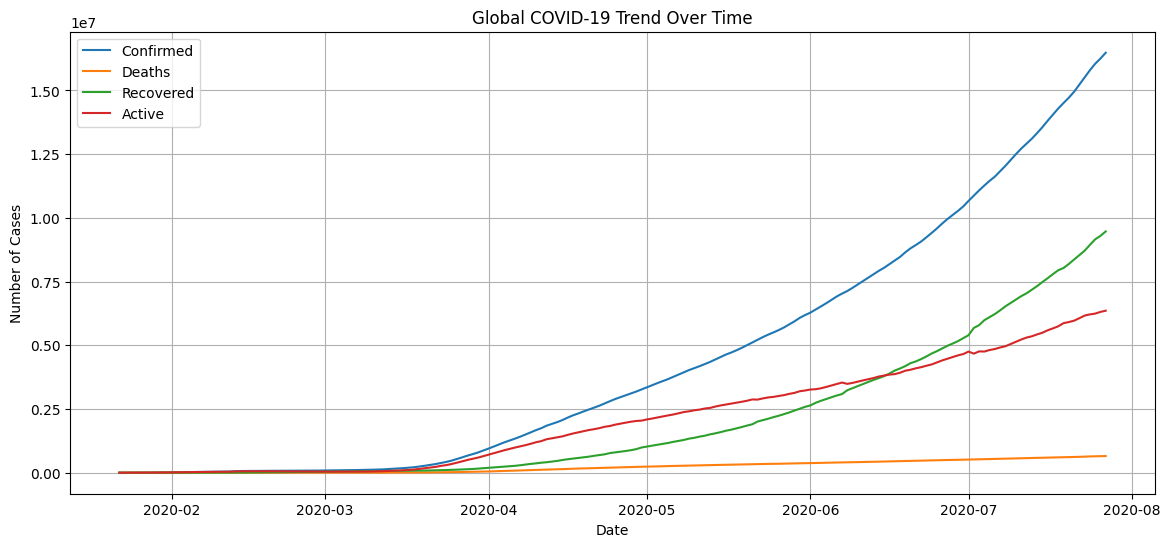

In [9]:
# Global Trend Over Time (Line Plot with Seaborn)

plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Confirmed', data=global_daily, label='Confirmed')
sns.lineplot(x='Date', y='Deaths', data=global_daily, label='Deaths')
sns.lineplot(x='Date', y='Recovered', data=global_daily, label='Recovered')
sns.lineplot(x='Date', y='Active', data=global_daily, label='Active')
plt.title('Global COVID-19 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# top 10 Countries by Confirmed Cases (Bar Chart using Plotly)

import plotly.express as px

top10 = country_total.head(10).reset_index()

fig = px.bar(top10, x='Country', y='Confirmed',
             color='Country',
             title='Top 10 Countries by Confirmed Cases')
fig.show()


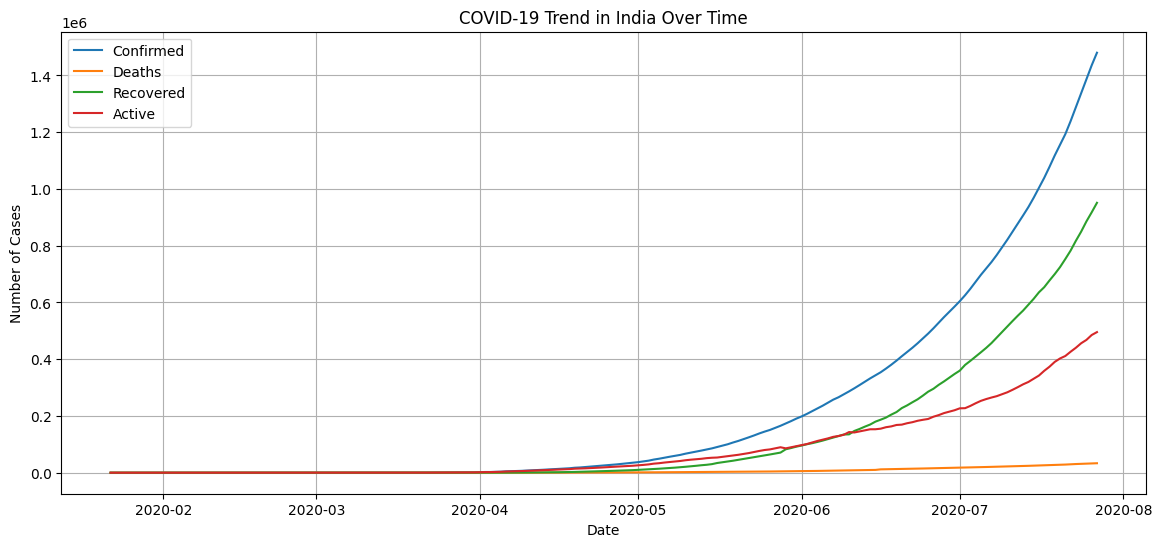

In [12]:
# Country-Specific Trend (Line Plot for India)

plt.figure(figsize=(14,6))
sns.lineplot(x='Date', y='Confirmed', data=india_daily, label='Confirmed')
sns.lineplot(x='Date', y='Deaths', data=india_daily, label='Deaths')
sns.lineplot(x='Date', y='Recovered', data=india_daily, label='Recovered')
sns.lineplot(x='Date', y='Active', data=india_daily, label='Active')
plt.title('COVID-19 Trend in India Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Interactive Time Series (Optional Bonus with Plotly)

fig = px.line(global_daily, x='Date', y=['Confirmed', 'Deaths', 'Recovered', 'Active'],
              title='Global COVID-19 Timeline (Interactive)')
fig.show()


Add Key Metrics + Generate Insights

    To Calculate:
        Death Rate
        Recovery Rate

And observe trends using these rates

In [ ]:
# Adding Death Rate & Recovery Rate Columns

df['DeathRate'] = (df['Deaths'] / df['Confirmed']) * 100
df['RecoveryRate'] = (df['Recovered'] / df['Confirmed']) * 100

df['DeathRate'] = df['DeathRate'].round(2)
df['RecoveryRate'] = df['RecoveryRate'].round(2)

In [20]:
# Snapshot: Latest Country-Wise Metrics

latest_df = df[df['Date'] == df['Date'].max()]  # Filter for the latest date

country_rates = latest_df.groupby('Country')[['Confirmed', 'Deaths', 'Recovered']].sum()
country_rates['DeathRate'] = (country_rates['Deaths'] / country_rates['Confirmed']) * 100
country_rates['RecoveryRate'] = (country_rates['Recovered'] / country_rates['Confirmed']) * 100
country_rates = country_rates.sort_values(by='Confirmed', ascending=False)
country_rates.head(10)


,Confirmed,Deaths,Recovered,DeathRate,RecoveryRate
Country,,,,,
US,4290259,148011,1325804,3.449932,30.902656
Brazil,2442375,87618,1846641,3.587410,75.608414
India,1480073,33408,951166,2.257186,64.264803
Russia,816680,13334,602249,1.632708,73.743572
South Africa,452529,7067,274925,1.561668,60.753013
Mexico,395489,44022,303810,11.131030,76.818824
Peru,389717,18418,272547,4.725993,69.934594
Chile,347923,9187,319954,2.640527,91.961152
United Kingdom,301708,45844,1437,15.194824,0.476288


In [21]:
# Death & Recovery Rates for Top Countries

top = country_rates.head(10).reset_index()

fig = px.bar(top, x='Country', y=['DeathRate', 'RecoveryRate'],
             barmode='group', title='Top 10 Countries: Death vs Recovery Rates')
fig.show()


Export Cleaned Data

In [ ]:
df.to_csv('covid_final_cleaned.csv', index=False)

INSIGHTS

- **Top countries**: USA, India, Brazil led in total confirmed cases.
- **Global trend**: Case count grew sharply during early 2020, then flattened.
- **Recovery Rate**: India showed a strong upward trend post-peak.
- **Death Rate**: Countries like Italy and UK had higher early fatality percentages.